<a href="https://colab.research.google.com/github/lNamelessl/ML-Projects/blob/main/Dimensionlity_Reduction_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Fetch the dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [8]:
# Split the datset into training and test sets
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Initialize the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [9]:
# Train the model and time it
%time rfc.fit(X_train, y_train)

CPU times: user 58.1 s, sys: 131 ms, total: 58.2 s
Wall time: 1min 5s


RandomForestClassifier(random_state=42)

In [11]:
y_pred =  rfc.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
# Check the accuracy score
accuracy_score(y_test, y_pred)

0.9705

In [14]:
from sklearn.decomposition import PCA

In [15]:
# Reduce the dimension
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [18]:
# Initailize a new model
rnd_with_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
%time rnd_with_clf.fit(X_train_reduced, y_train)

CPU times: user 3min, sys: 398 ms, total: 3min
Wall time: 3min 29s


RandomForestClassifier(random_state=42)

In [21]:
X_test_reduced = pca.transform(X_test)
y_pred_reduced = rnd_with_clf.predict(X_test_reduced)

In [22]:
accuracy_score(y_pred_reduced, y_test)

0.9488

Try it with SGDClassifier

In [23]:
from sklearn.linear_model import SGDClassifier

In [25]:
# Fit the dataset and time it
sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train, y_train)

CPU times: user 3min 21s, sys: 415 ms, total: 3min 21s
Wall time: 3min 53s


SGDClassifier(random_state=42)

In [26]:
# Check the test score
y_pred_sgd = sgd_clf.predict(X_test)
accuracy_score(y_pred_sgd, y_test)

0.874

In [29]:
sgd_clf_with_pca = SGDClassifier(random_state=42)

In [31]:
# Train with the reduced datset
%time sgd_clf_with_pca.fit(X_train_reduced, y_train)

CPU times: user 44.2 s, sys: 44.8 ms, total: 44.2 s
Wall time: 44.4 s


SGDClassifier(random_state=42)

In [33]:
# Check the score for the reduced dataset
y_pred_sgd_with_pca = sgd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_pred_sgd_with_pca, y_test)

0.8959

Try TSNE

In [ ]:
X_sample, y_sample = X_train[:5000], y_train[:5000]

In [35]:
from sklearn.manifold import TSNE
# Init tsne class
tsne = TSNE(n_components=2, init="random", random_state=42)
# fit and check the time it takes to fit
%time X_reduced = tsne.fit_transform(X_sample)

CPU times: user 1min 5s, sys: 95.7 ms, total: 1min 5s
Wall time: 1min 20s


In [40]:
from matplotlib import pyplot as plt
import numpy as np

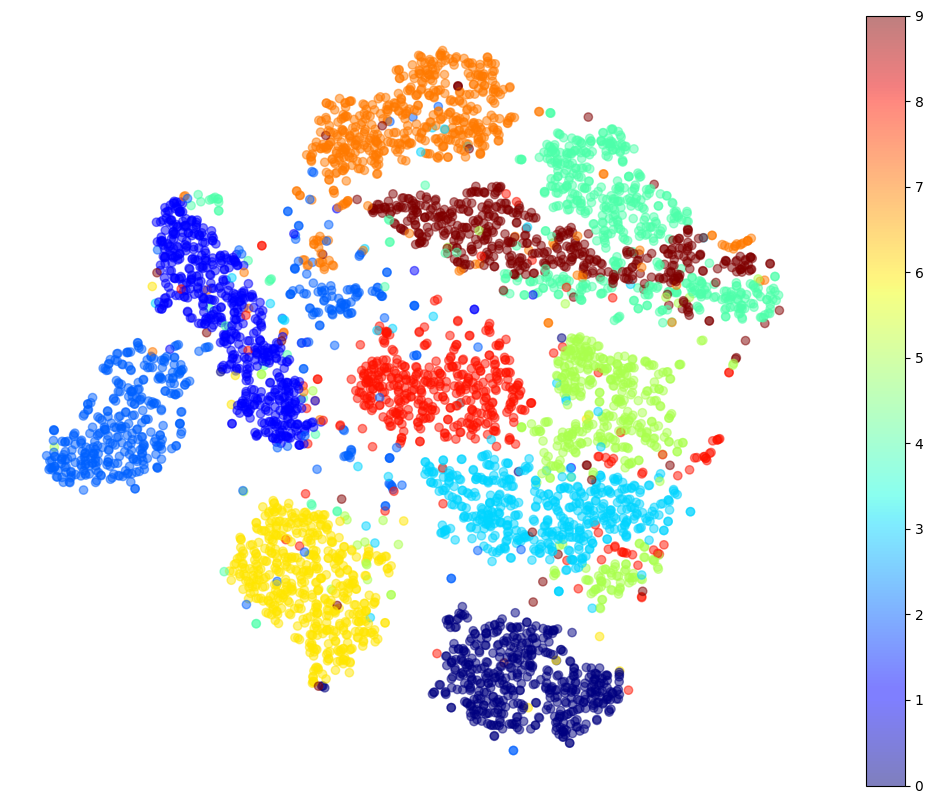

In [41]:
# Plot the reduced dataset
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()